# Business Understanding

The company Dream Housing Finance (DHF) deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer's eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out an online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments that are eligible for loan amounts to specifically target these customers that seem safe to borrow money from DHF. DHF owns data from its past operation that is regarded as one of its most valuable business assets. We can find the data in the loan.csv dataset. 


The following report presents the CRISP-DM phases developed in a Jupyter Notebook (Python 3) using the libraries: NumPy, pandas, matplotlib, seaborn, stats model, sklearn, among others. We stored the loan.csv dataset in a data frame which we thoroughly manipulated to obtain the correct predictions of the prediction.csv.


# Data Understanding and Data Preparation

Firstly, we developed a series of data cleaning, data engineering, exploratory data analysis (EDA), and data selection tasks as part of the data understanding and preparation stages to understand the nature of the attributes, the relationship among themselves and with the target variable (approve or disapprove loan).

In [1]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#sklearn modules for Model Evaluation & Improvement:    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

### Initial Data Analysis

First of all, we deleted the variable *Loan_ID* since it provided no meaningful information. 

In [2]:
# Download Data
data = pd.read_csv('loan.csv')
del data['Loan_ID']

The dataset initially contained information on 618 customers who have asked for a loan to DHF. The information in these clients appears across 12 different independent features, both categorial (*Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area*) and numerical (*ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History*). In addition, the target variable (Loan_Status) is binary, with the classification of “Y” (if the client was granted a loan) or “N” (if the client was not given a loan). The characteristics of each are presented below:

In [3]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.describe(include=[object])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Next, we changed the data type of *Credit_History* from numerical to categorical since we found out that its values only lay among 0 and 1. Where 0 meant that they did not have a credit history; otherwise, its value was one. 

In [9]:
data['Credit_History'] = data['Credit_History'].astype(object)

Then, we divided the data frame into two datasets, one that contained the information of categorical variables and the other with the numerical ones. 

In [10]:
data_cat = data.select_dtypes(include=['object'])
data_num = data.select_dtypes(exclude=['object'])

### Missing Data

From here, we analyzed the percentage of missing data in each dataset. Five of the categorical variables had missing data (*Gender, Married, Dependents, Self_Employed, and Credit_History*). 

In [11]:
pd.DataFrame(data_cat.isnull().sum()/len(data_cat)*100,columns=["NA"])

,NA
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
Credit_History,8.143322
Property_Area,0.000000
Loan_Status,0.000000


Then, we analyzed the numerical variables, two of which contained missing data 

In [12]:
pd.DataFrame(data_num.isnull().sum()/len(data_num)*100,columns=["NA"])

,NA
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


To correct this in categorical data, we used the *SimpleImputer* function from the sklearn library, where we imputed the missing values with the most frequent values from each column. 

In [13]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data_cat)
data_cat_new = pd.DataFrame(imp.transform(data_cat))
data_cat_new.columns = data_cat.columns
df_cat = data_cat_new.copy()

For the numerical data we use the KNNImputer that fills missing values through the implementation of the k-Nearest Neighbor approach.

In [14]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

nan = np.nan
imp = KNNImputer(n_neighbors=2, weights="uniform")
data_num_new_1 = pd.DataFrame(imp.fit_transform(data_num))
data_num_new_1.columns = data_num.columns

sc_X = MinMaxScaler()
data_num_new = pd.DataFrame(sc_X.fit_transform(data_num_new_1))
data_num_new.columns = data_num_new_1.columns

df_num = data_num_new.copy()

Now there is no more missing data

In [15]:
pd.DataFrame(data_cat_new.isnull().sum()/len(data_cat_new)*100,columns=["NA"])

,NA
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
Credit_History,0.0
Property_Area,0.0
Loan_Status,0.0


In [16]:
pd.DataFrame(data_num_new.isnull().sum()/len(data_num_new)*100,columns=["NA"])

,NA
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


### Balance Dataset

Additionally, we analyzed the data balance through the target variable Loan_Status, where we noticed that 422 customers were granted a loan and only 192 did not. 

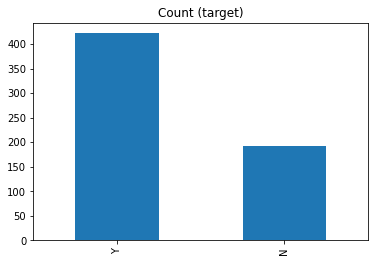

In [17]:
df = data_cat_new.join(data_num_new)
df.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

The unbalanced target variable shows that the proportion of the category “Y” is 2.2 concerning category “N.” 

In [18]:
target_count = df.Loan_Status.value_counts()
print('Class Yes:', target_count[0])
print('Class No:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class Yes: 422
Class No: 192
Proportion: 2.2 : 1


Thus, we proceeded into developing a random oversampling in the type “N,” where we resulted in 422 customers for each category.

In [19]:
# Class count
count_class_0, count_class_1 = df.Loan_Status.value_counts()

# Divide by class
df_class_0 = df[df['Loan_Status'] == 'Y']
df_class_1 = df[df['Loan_Status'] == 'N']

Random over-sampling:
N    422
Y    422
Name: Loan_Status, dtype: int64


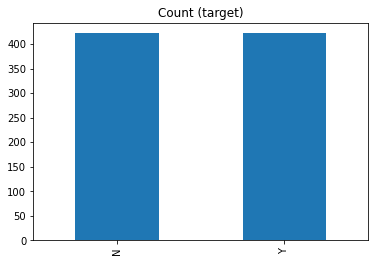

In [20]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0).reset_index(drop=True)

print('Random over-sampling:')
print(df_over.Loan_Status.value_counts())

df_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

## Exploratory Data Analysis

#### Categorical Data

Next, we performed the Exploratory Data Analysis (EDA) for the categorical data. For this analysis, we developed a series of bar plots that convey the frequency of the unique values of each variable. Additionally, we also developed a plot with the proportions regarding if the loans had been accepted or not. We concluded from these plots that male customers ask more for loans than women; however, both genders have the same probability of being granted a loan. Therefore, with this analysis, we can conclude that gender is not a determining factor in predicting if a loan should be granted or not.

Furthermore, more married clients ask for loans, and they have a higher probability of being accepted. Customers who have no dependents have a significantly higher likelihood of asking for a loan. Still, curiously, if the client has two dependents, they have a higher probability of being granted the loan. Moreover, if the applicant is not graduated from college, they have a lower likelihood of being accepted for a loan. The customer's credit history is the most significant variable since it shows that the customers who have a credit history appear to have an almost 80% probability of being granted a loan. However, if the customer does not have a credit history, they have only a 7.9% chance of getting a loan. Finally, suppose the property is in a suburban area. In that case, the client has a higher probability of being granted a loan than if the property was in an urban or rural area.


In [21]:
Balanced_data = pd.read_excel('Balanced Data.xlsx')
Balanced_data = Balanced_data.iloc[: , 1:]
Balanced_data['Credit_History'] = Balanced_data['Credit_History'].astype(object)

data_cat_new = Balanced_data.select_dtypes(include=['object'])
df_cat = data_cat.copy()
data_num_new = Balanced_data.select_dtypes(exclude=['object'])
df_num = data_num.copy()

In [22]:
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
        ax.annotate(label,
                (x_value, y_value),         
                 xytext=(0, space),
                 textcoords="offset points", 
                 ha='center',va=va)

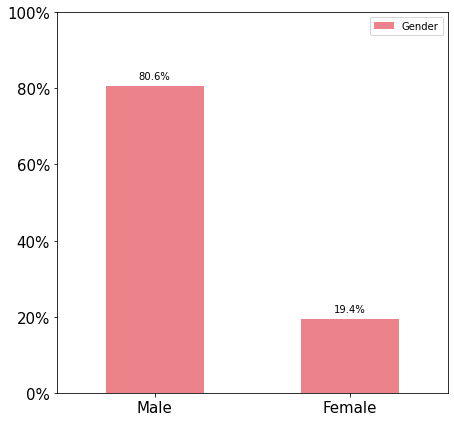

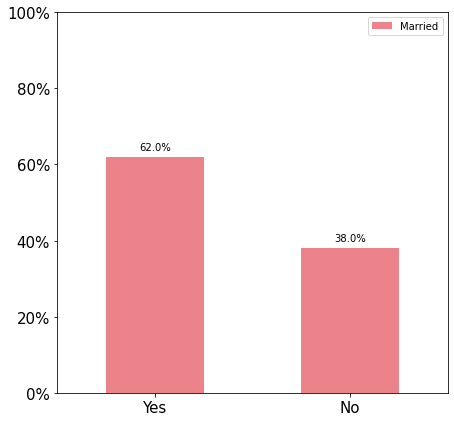

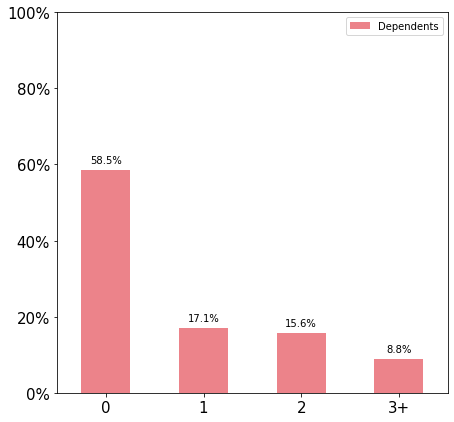

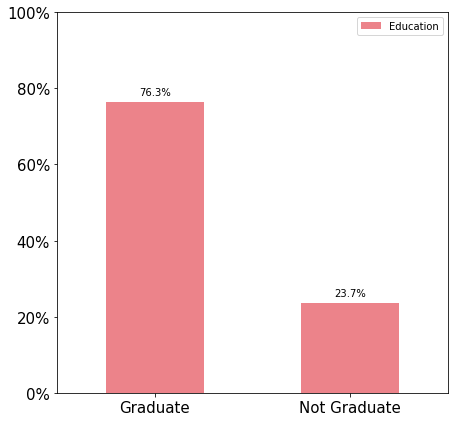

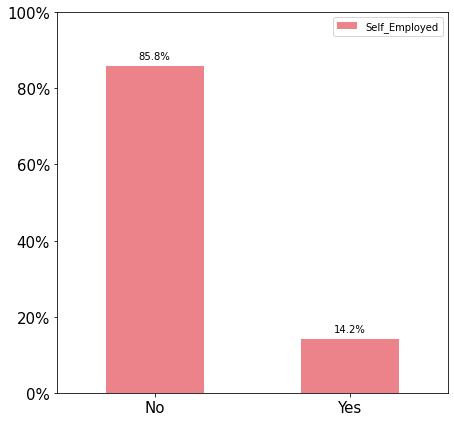

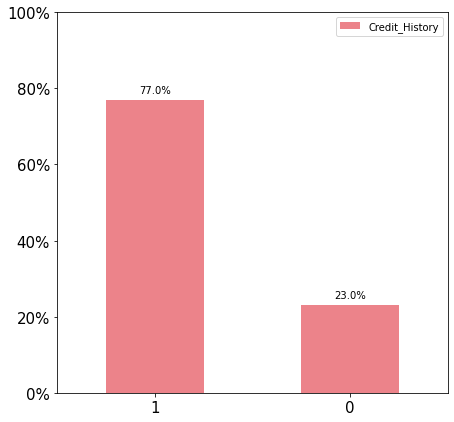

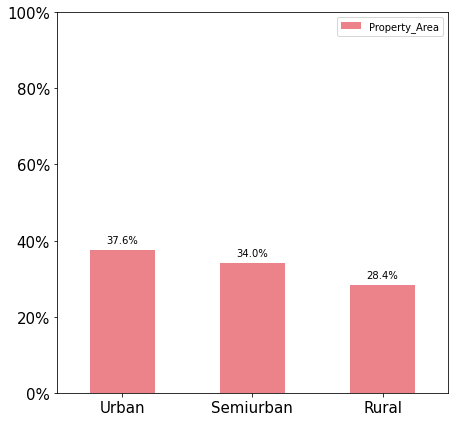

In [23]:
for col in data_cat_new.columns[0:]:
    if col != 'Loan_Status':
        data = (data_cat_new[col].value_counts(normalize=True))*100
        ax = data.plot.bar(legend =True, table = False,grid = False,  subplots = False, 
        figsize =(7, 7), color = '#ec838a', fontsize = 15, stacked=False, 
        ylim =(0,100))

        #plt.legend(loc='upper right', fontsize = "medium")
        plt.xticks(rotation=0, horizontalalignment="center")
        plt.yticks(rotation=0, horizontalalignment="right")
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        #plt.title(col)
        add_value_labels(ax)
        ax.autoscale(enable=False, axis='both', tight=False)
        plt.show()
    

In [24]:
import matplotlib.ticker as mtick

def group_barplot(x_plt):
    loan_status =df_cat.groupby([x_plt,'Loan_Status']).size().unstack()
    loan_status.rename(columns={'N':'No', 'Y':'Yes'}, inplace=True)

    colors  = ['#ec838a','#9b9c9a']
    ax = (loan_status.T*100.0 / loan_status.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (7,7),fontsize = 15,color = colors)

    plt.ylabel('Proportion of Customers\n',
    horizontalalignment="center",fontstyle = "normal", 
    fontsize = "large", fontfamily = "sans-serif")

    plt.xlabel(f'{x_plt}\n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "large", 
    fontfamily = "sans-serif")

    plt.title(f'Loan Status by {x_plt} \n',
    horizontalalignment="center", fontstyle = "normal", 
    fontsize = "22", fontfamily = "sans-serif")
    plt.legend(loc='upper right', fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

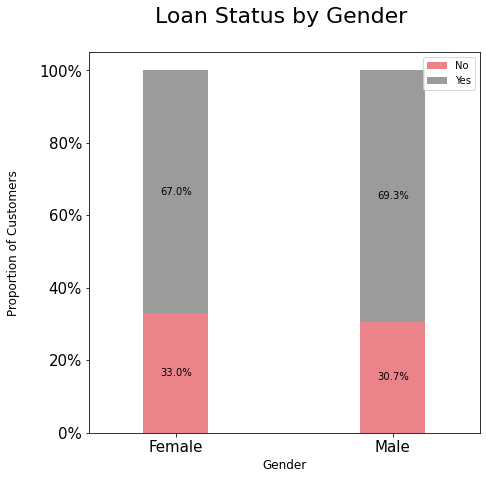

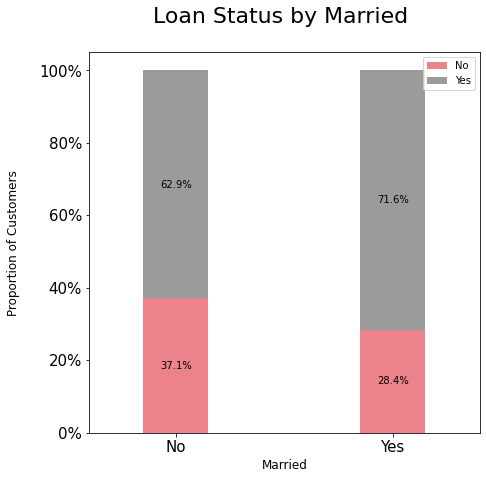

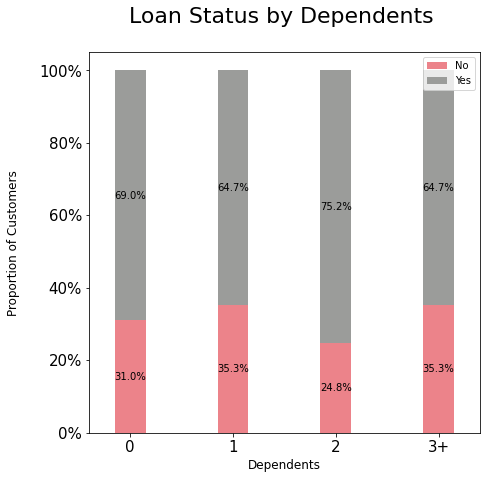

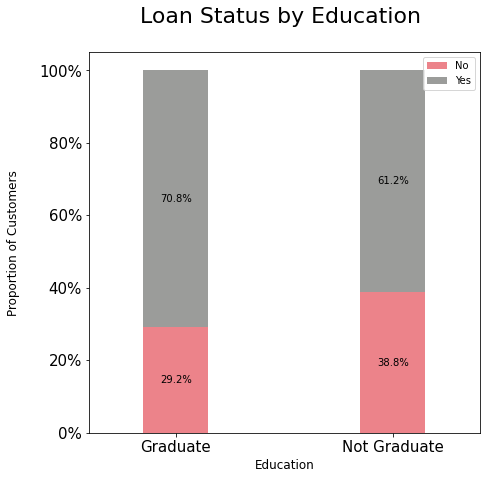

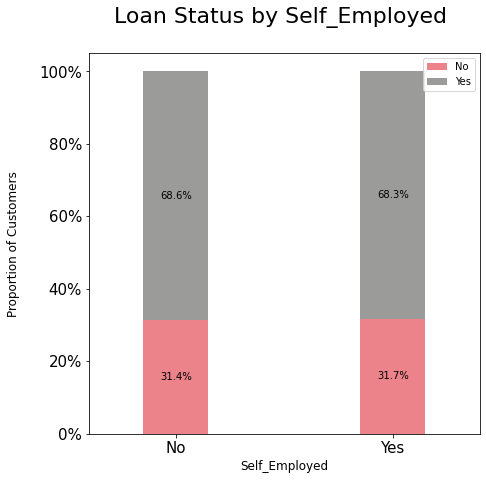

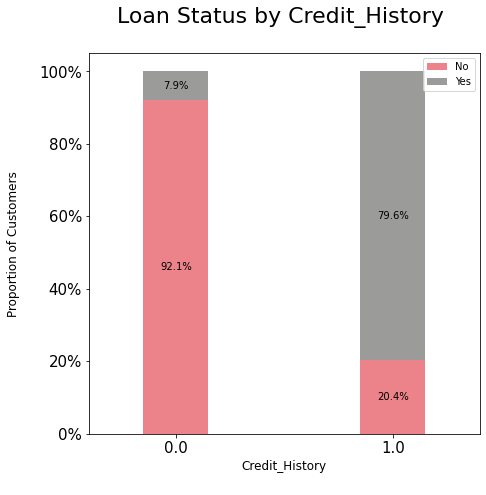

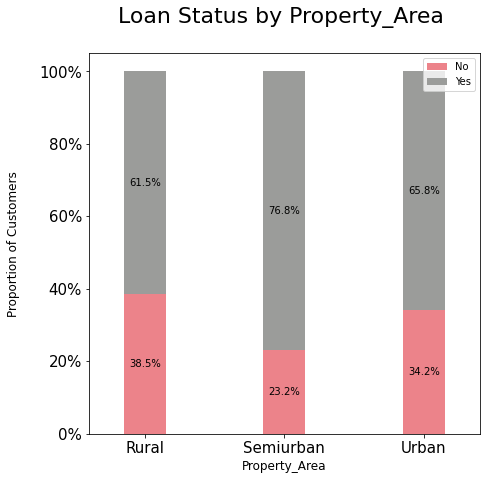

In [25]:
for i in df_cat.columns:
    if i != 'Loan_Status':
        group_barplot(i)

### Label encoding and One hot encoding

Furthermore, we transformed the categorical variables by implementing label encoding, and we also applied one-hot Encoding to those with more than two unique variables. 

In [26]:
data_cat_new.nunique()

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Credit_History    2
Property_Area     3
Loan_Status       2
dtype: int64

In [27]:
le = LabelEncoder()
n = 0
for col in data_cat_new.columns[0:]:
    le.fit(data_cat_new.loc[:,col])
    data_cat_new.loc[:,col] = le.transform(data_cat_new.loc[:,col])

/Users/valeriaviridianapinedaromero/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/valeriaviridianapinedaromero/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_dep = pd.DataFrame(enc.fit_transform(data_cat_new[['Dependents']]).toarray())
enc_dep =enc_dep.rename(columns={0: 'Dependendents_0',
                              1: 'Dependendents_1',
                              2: 'Dependendents_2',
                              3: 'Dependendents_3'})

enc_prop = pd.DataFrame(enc.fit_transform(data_cat_new[['Property_Area']]).toarray())
enc_prop =enc_prop.rename(columns={0: 'Property_Area_0',
                                   1: 'Property_Area_1',
                                   2: 'Property_Area_2'})

# merge with main df data_cat_new on key values
data_cat_new = data_cat_new.join([enc_dep,enc_prop])
sc_X = StandardScaler()

data_cat_new = data_cat_new.drop(columns=['Dependents','Property_Area'])

#### Numerical Variables

Furthermore, for the numerical data, we first visualized the distribution of each variable through a histogram, where we see that most of them are skewed to the right, except for the *Loan_Amount_Term* variable. 

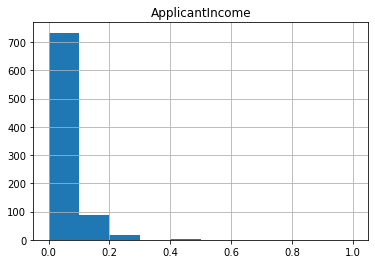

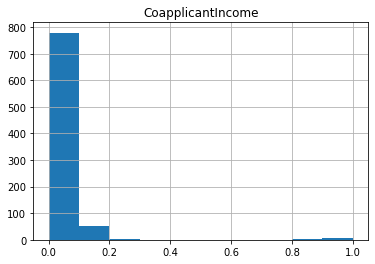

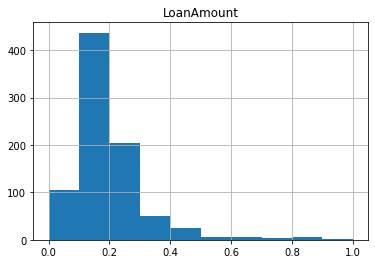

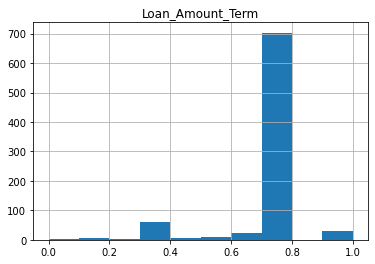

In [29]:
for i in data_num_new.columns:
    data_num_new[i].hist()
    plt.title(i)
    plt.show()

Additionally, we developed a series of boxplots that describe the distribution of the data of each numerical variable and its loan status. From these plots, we can see that all of them convey a very similar distribution between the data of the accepted and rejected loans. Thus, they appear non-meaningful for predicting the target variable. To analyze this more in-depth, we developed a series of ANOVA F-tests to prove that the mean of each numerical variable for accepted loans is the same as that for unaccepted. The results of this analysis appear in the following code. These results prove that it seems that the numerical data does not influence the decision of whether the loan is accepted or not.

ApplicantIncome
Mean ApplicantIncome for customers who recieved a loan 0.06473801756807857
Mean ApplicantIncome for customers who did not recieve a loan 0.06076617807829727


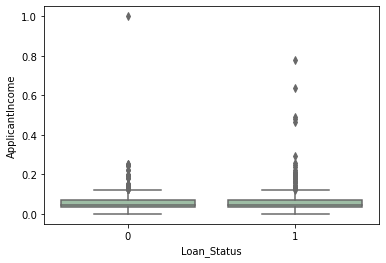

P-value: 0.3906901606794886
Probably the same distribution

CoapplicantIncome
Mean CoapplicantIncome for customers who recieved a loan 0.036108104689018844
Mean CoapplicantIncome for customers who did not recieve a loan 0.04902694427733678


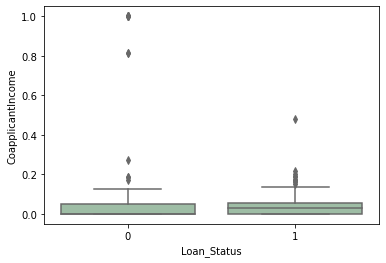

P-value: 0.07251696391284193
Probably the same distribution

LoanAmount
Mean LoanAmount for customers who recieved a loan 0.1956828142468158
Mean LoanAmount for customers who did not recieve a loan 0.19933505257165585


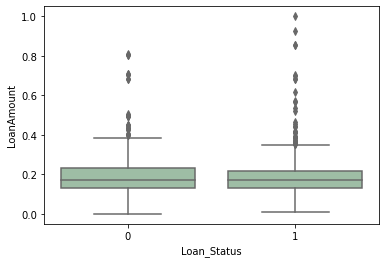

P-value: 0.6605917368913361
Probably the same distribution

Loan_Amount_Term
Mean Loan_Amount_Term for customers who recieved a loan 0.7030015797788307
Mean Loan_Amount_Term for customers who did not recieve a loan 0.7123283509539432


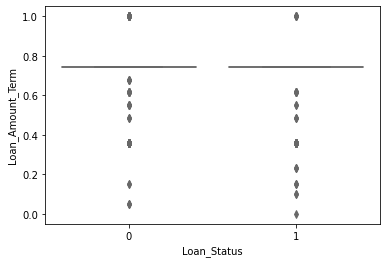

P-value: 0.328539206887556
Probably the same distribution



In [30]:
import scipy.stats as stats
import seaborn as sns
Probably_different_distributions=[]

data_num_new_2 = data_num_new.join([data_cat_new['Loan_Status']])
loan=data_num_new_2[data_num_new_2['Loan_Status']==1]
no_loan=data_num_new_2[data_num_new_2['Loan_Status']==0]

for i in data_num_new.columns:
    mean_loan=np.mean(loan[i])
    mean_no_loan=np.mean(no_loan[i])
    print(i)
    print(f'Mean {i} for customers who recieved a loan {mean_loan}')
    print(f'Mean {i} for customers who did not recieve a loan {mean_no_loan}')
    ax = sns.boxplot(x='Loan_Status', y=i, data=data_num_new_2, color='#99c2a2')
    plt.show()
    # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
    fvalue, pvalue = stats.f_oneway(loan[i], no_loan[i])
    print(f'P-value: {pvalue}')
    if pvalue > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')
        Probably_different_distributions.append(i)

    print()


### Correlation Analysis

#### Numerical Variables

To finalize EDA, we developed a correlation analysis heatmap, where we convey the linear relationship in a correlation matrix among numerical variables. 

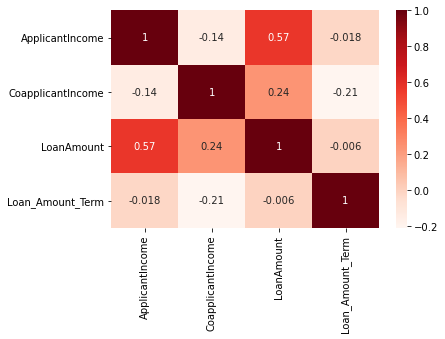

In [31]:
sns.heatmap(data_num_new.corr(), annot=True, cmap = 'Reds')
plt.show()

The we developed another heatmap but now considering all variables. The heatmap shows that the categorical variables resulting from the one-hot encoding (*Dependents_0, Dependents_1, Dependents_2, Dependents_3, Property_Area_0, Property_Area_1, Property_Area_2*) have a pronounced negative linear correlation among them. However, we can see that married status has a 37% correlation with gender. If the person is male, they have a higher probability of also being married. Additionally, there is a 25% correlation between being married and having two dependents, which makes sense since most of the time, married couples who have a growing family, tend to ask for loans to buy a bigger house. Furthermore, the amount of money being loaned has a 57% correlation with the applicant's income. This conclusion makes sense since the more an applicant gains, the more they would be able to pay; thus, the more they are loaned.

Finally, we analyzed the variables that appeared to correlate significantly with our target variable, Loan_Status. We see that people who are asking for loans in the urban area have an 18% probability of being granted the loan. Additionally, if the applicant is married, they have a 13% probability of having an accepted loan. Also, we can conclude that having a credit history has the most influence on whether the loan is accepted or rejected, with a 51% correlation.

In [32]:
final_data= data_cat_new.join([data_num_new])

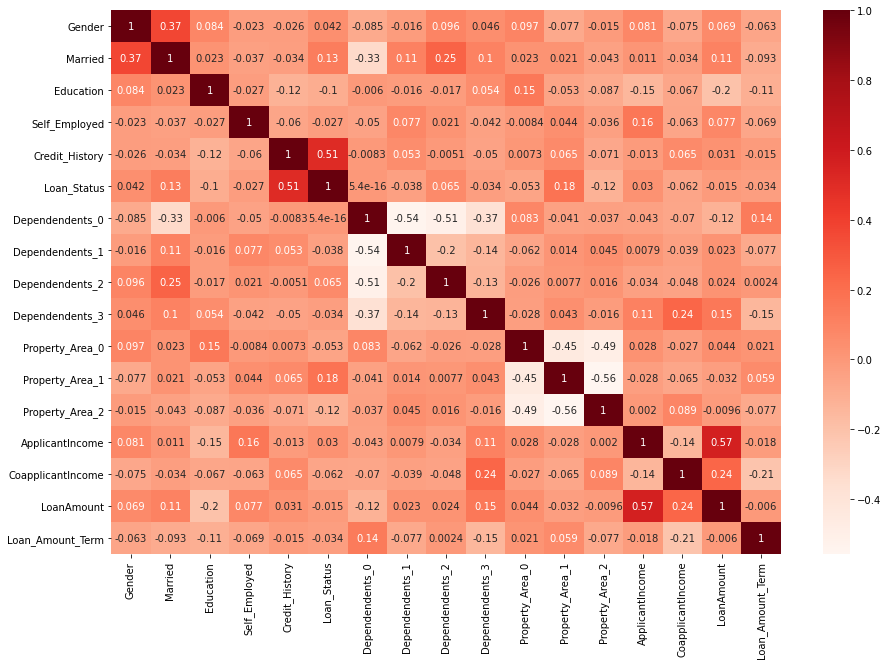

In [33]:
plt.figure(figsize = (15, 10))
sns.heatmap(final_data.corr(), annot=True, cmap = 'Reds')

plt.show()

Furthermore, we performed Kendall’s Rank Correlation hypothesis test to determine whether the correlation between the categorical target variable Loan_Status and the independent numerical variables is significant. For these tests, the null hypothesis would be that both variables are independent. Therefore, this analysis concludes that the numerical variables seem to be independent of the target variable.

In [34]:
# Kendall Tau
# Numerical
y = data_cat_new['Loan_Status']
from scipy.stats import kendalltau
for i in data_num_new.columns:
    if i != 'Loan_Status':
        data1 = y
        data2 = data_num_new[i]
        stat, p = kendalltau(data1, data2)
        print(i)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print()

ApplicantIncome
stat=0.004, p=0.890
Probably independent

CoapplicantIncome
stat=0.057, p=0.059
Probably independent

LoanAmount
stat=-0.007, p=0.796
Probably independent

Loan_Amount_Term
stat=-0.020, p=0.549
Probably independent



Moreover, we developed the Xi2 hypothesis tests to evaluate the correlation between the target and categorical variables. According to the results, we can see that the variables *Married, Education, Credit_History, Dependents_2, Property_Area_1, and Property_Area_2* seem to have a significant correlation with the target variable.

In [35]:
# Chi square
# Categorical
from scipy.stats import chi2_contingency

for i in data_cat_new.columns:
    if i != 'Loan_Status':
        data1 = data_cat_new['Loan_Status']
        data2 = data_cat_new[i]
        table = pd.crosstab(data1, data2)
        stat, p, dof, expected = chi2_contingency(table)
        print(i)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
            #Probably_dependent_variables.append(i)
        print()

Gender
stat=1.279, p=0.258
Probably independent

Married
stat=13.594, p=0.000
Probably dependent

Education
stat=8.027, p=0.005
Probably dependent

Self_Employed
stat=0.476, p=0.490
Probably independent

Credit_History
stat=214.454, p=0.000
Probably dependent

Dependendents_0
stat=0.000, p=1.000
Probably independent

Dependendents_1
stat=1.013, p=0.314
Probably independent

Dependendents_2
stat=3.242, p=0.072
Probably independent

Dependendents_3
stat=0.726, p=0.394
Probably independent

Property_Area_0
stat=2.102, p=0.147
Probably independent

Property_Area_1
stat=25.870, p=0.000
Probably dependent

Property_Area_2
stat=12.630, p=0.000
Probably dependent



### RFE feature selection

We developed an RFE feature selection strategy to finalize the data preparation phase. Through this technique we found the most significant variables that predict the *Loan_Status*. We first got the optimum number of features according to a Logistic Regression model. This analysis concluded that we required only six variables to achieve the highest accuracy possible.  

In [36]:
X = final_data.drop(columns = "Loan_Status")
y = final_data['Loan_Status'].astype(int)

In [37]:
from sklearn.feature_selection import RFE
#MAX no of features
nof_list=np.arange(1,len(final_data.columns)-1)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
    rfe = RFE(model,n_features_to_select=nof_list[n], step=1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print(f'Optimum number of features: {nof}')
print(f"Score with {nof} features: {high_score}")

Optimum number of features: 6
Score with 6 features: 0.6850393700787402


Next, we applied for this number again to the logistic regression. As a result, we obtained that *Married, Credit History, Property_Area_1, ApplicantIncome, CoapplicantIncome, and LoanAmountwere* the most valuable variables to predict the target variable.

In [38]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

#Initializing RFE model
rfe = RFE(model, n_features_to_select=nof, step=1)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False False False False False  True False
  True  True  True False]
[10  1  4  9  1  8  3  7 11  6  1  5  1  1  1  2]


In [39]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i]==1:
        print(X.columns[i])

Married
Credit_History
Property_Area_1
ApplicantIncome
CoapplicantIncome
LoanAmount


### VIF Analysis

Now that we have this information, we developed a VIF analysis of the significant variables. This analysis tells us that the essential variables in the dataset do not contain multicollinearity problems, so all of these may be part of the final data to feed the model.

In [40]:
modeling_dataset = X[['Married','Credit_History','Property_Area_1','ApplicantIncome','CoapplicantIncome','LoanAmount']]


In [41]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

calc_vif(modeling_dataset)

,variables,VIF
0,Married,2.267208
1,Credit_History,2.796159
2,Property_Area_1,1.462494
3,ApplicantIncome,3.139574
4,CoapplicantIncome,1.419624
5,LoanAmount,5.755920


# Modeling

We applied decision trees, logistic regression, support vector machines, Naïve Bayes, and ensemble methods bagging, boosting, and XGB models to predict the target variable Loan_Status. We first divided the data into the dependent and independent variables, called y and X, respectively, to evaluate these models. Then, we divided them into training and test set, with an 80%-20% ratio.

In [42]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------

y = np.where(y > 0.5, 1, 0)
X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(X, y, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_train_holdout, y_train_holdout, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (540, 16)
Number transactions y_train dataset:  (540,)
Number transactions X_test dataset:  (135, 16)
Number transactions y_test dataset:  (135,)


In [43]:
#----------------------------------------------------------------------------------------
#-----------------Section C: Model Selection------------------------------------------
#----------------------------------------------------------------------------------------

#Step 15.1: Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics

# and ensemble methods boosting, XGB.

models = []

#logistic regression
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
#naïve bayes
models.append(('Naïve Bayes', GaussianNB()))

# support vector machines
models.append(('SVM', SVC(kernel = 'rbf', random_state = 0)))

# Boosting
models.append(('GBM',GradientBoostingClassifier()))

# XGB.
models.append(('XGB', XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)))


#decision trees
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

#bagging
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



# Evaluation

For the evaluation of the algorithms, we developed a K Fold Cross-Validation such as in the figure below. This technique consists of the training set partitioning into equal-sized K parts. One of these partitions is used as a validation set and the rest as a sub-training set. For this strategy, we defined a total of 10 partitions. The table contains the mean of the metrics for each algorithm in terms of ROC/AUC, accuracy, precision, recall, and f1 score.

In [44]:
#Evaluating Model Results: 
acc_results = []
auc_results = []
names = []
# set table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 
       'Accuracy Mean', 'Precision Mean','Recall Mean','F1 Score Mean']
model_results = pd.DataFrame(columns=col)

i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    cv_precision_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='precision')
    
    cv_recall_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='recall')
    
    cv_f1_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='f1')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_precision_results.mean()*100, 2),
                         round(cv_recall_results.mean()*100, 2),
                         round(cv_f1_results.mean()*100, 2),
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)



,Algorithm,ROC AUC Mean,Accuracy Mean,Precision Mean,Recall Mean,F1 Score Mean
6,Random Forest,92.90,87.59,87.24,88.53,87.78
4,XGB,91.71,86.11,87.54,84.02,85.68
3,GBM,88.94,82.04,79.51,86.09,82.54
5,Decision Tree Classifier,84.06,84.07,85.18,82.34,83.58
2,SVM,81.35,73.52,67.97,89.49,76.89
0,Logistic Regression,80.79,74.63,69.74,86.56,76.99
1,Naïve Bayes,78.44,72.96,66.20,94.80,77.70


Next, we developed the boxplots that contain the distribution of the accuracy score, and ROC/AUC score for each algorithm. From these plots, we can conclude that some of the best models for fitting these data are GBM, XGB, Decision Tree, and Random Forest. These models achieve significantly higher accuracy and ROC/AUC scores than others.

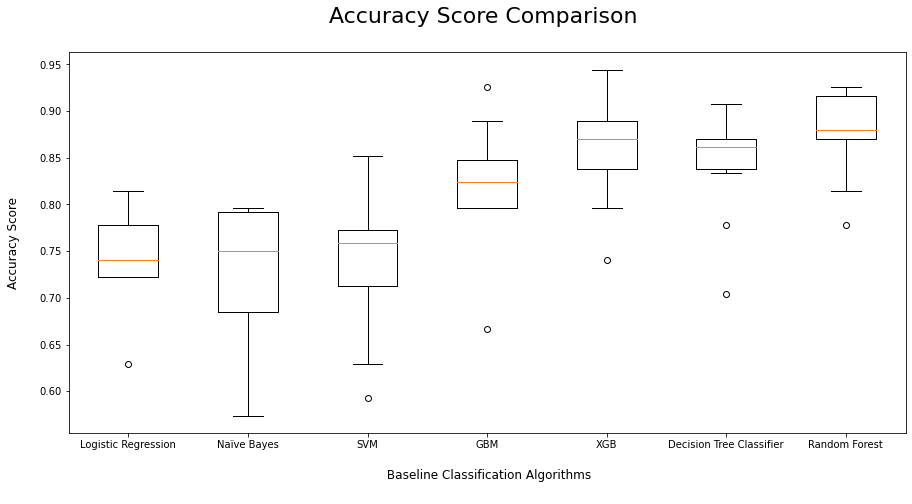

In [45]:
#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------

  
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()



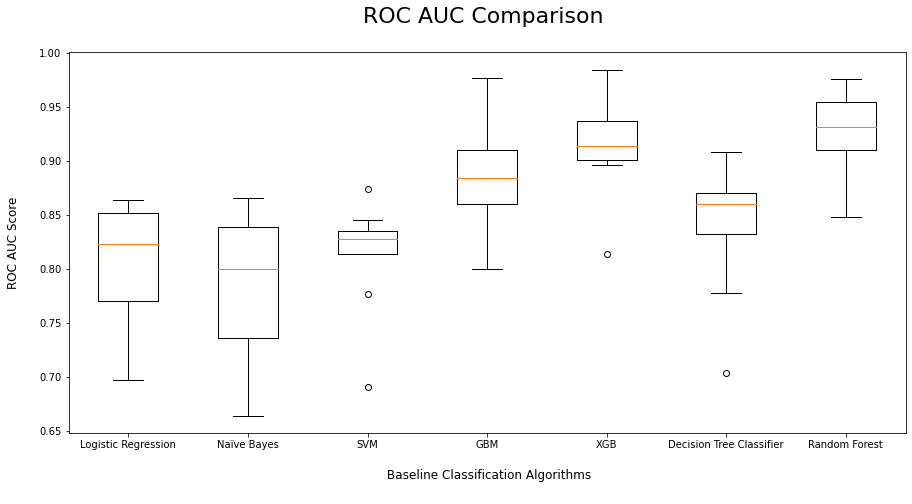

In [46]:
# using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

### Parameter Tuning

For the next iteration, we developed some hyperparameter tuning for the algorithms that attained the best accuracy and AUC scores (GBM, XGB, Decision Tree, and Random Forest) so that they may further improve their metrics. The hyperparameter tuning was developed through the use of GridSearchCV, this function allowed us to try different values for several parameter. Where the results were the following:
- The best parameters for Random Forest are {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'n_estimators': 45}
- The best parameters for GBM are {'learning_rate': 0.1, 'n_estimators': 250, 'max_depth': 4}
- The best parameters for Decision Tress are {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
- The best parameters for XGB are {'gamma': 0.1, 'max_depth': 15, 'min_child_weight': 1}


#### Random Forest 

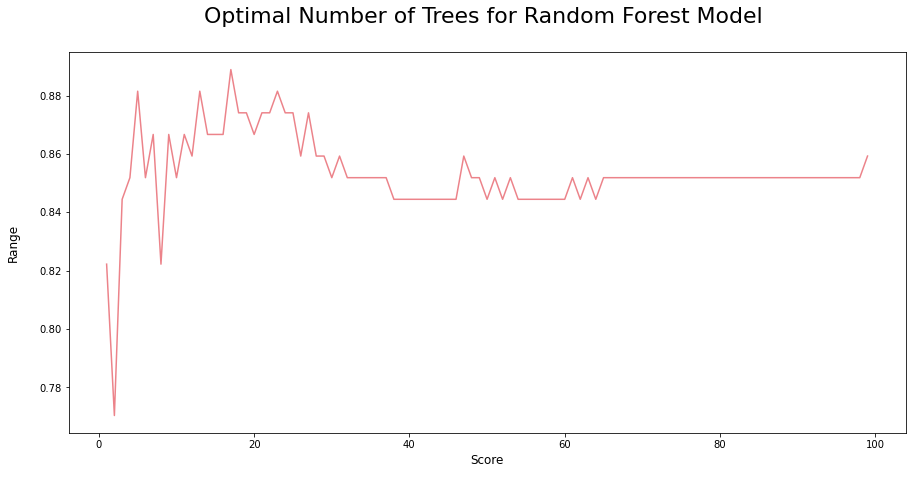

The k is 17 with a maximum score of: 0.8888888888888888


In [49]:
#Identify optimal number of trees for Random Forest Model:
 
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

max_index = score_array.index(max(score_array))
bestScore = score_array[max_index]
k = max_index+1

print(f'The k is {k} with a maximum score of: {bestScore}')

In [50]:
p_test3 = {'max_depth': range(1,20,2), 
    'min_samples_leaf': range(1,15,2),
    'criterion': ["gini", "entropy"],
    'n_estimators': range(1,60)}

tuning = GridSearchCV(estimator = RandomForestClassifier(random_state = 1, criterion = 'gini'), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
print(f'The best parameters for RF are {tuning.best_params_}, with an accuracy score of {tuning.best_score_}')

The best parameters for RF are {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'n_estimators': 45}, with an accuracy score of 0.8833333333333334


#### GBM

In [51]:
# Tuning n_estimators and Learning rate for GBM
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
print(f'The best parameters for GBM are {tuning.best_params_}, with an accuracy score of {tuning.best_score_}')

The best parameters for GBM are {'learning_rate': 0.1, 'n_estimators': 250}, with an accuracy score of 0.875925925925926


In [59]:
# Tunign max_depth and Learning rate for GBM
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,n_estimators=250, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
print(f'The best parameters for GBM are {tuning.best_params_}, with an accuracy score of {tuning.best_score_}')

The best parameters for GBM are {'max_depth': 4}, with an accuracy score of 0.875925925925926


#### Decision Trees

In [53]:
# Tuning n_estimators and Learning rate for DT
p_test3 = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

tuning = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 0), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
print(f'The best parameters for DT are {tuning.best_params_}, with an accuracy score of {tuning.best_score_}')

The best parameters for DT are {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}, with an accuracy score of 0.7944444444444445


#### XGB

In [54]:
param_test1 = {
 'max_depth':[10, 15, 20, 25],
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)]
}
tuning = GridSearchCV(estimator = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
print(f'The best parameters for DT are {tuning.best_params_}, with an accuracy score of {tuning.best_score_}')

The best parameters for DT are {'gamma': 0.1, 'max_depth': 15, 'min_child_weight': 1}, with an accuracy score of 0.8555555555555555


### Evaluation with parameter Tuning

The resulting metrics of these changes appear in the table below in terms of AUC, accuracy, recall, F1 score, and confusion matrix 

##################### Results Using Logistic Regression #####################


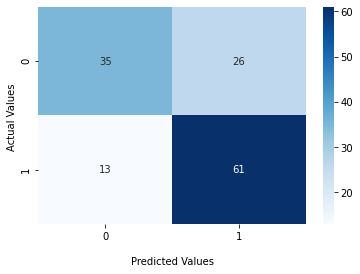

##################### Results Using Naive Bayes #####################


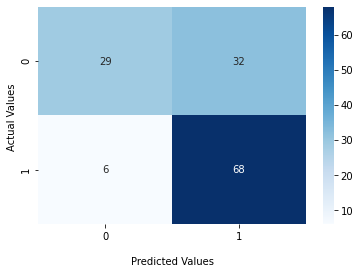

##################### Results Using Support Vector Machine #####################


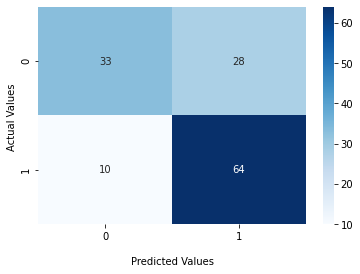

##################### Results Using Gradient Boosting #####################


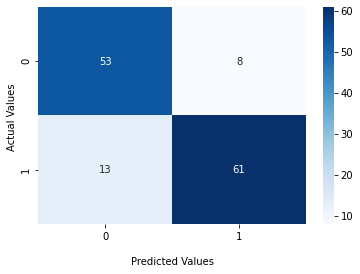

##################### Results Using XGB #####################


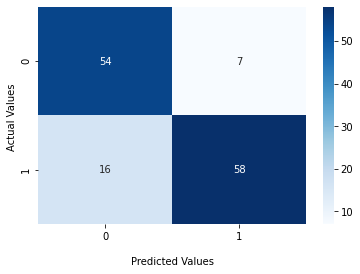

##################### Results Using Decision Tree #####################


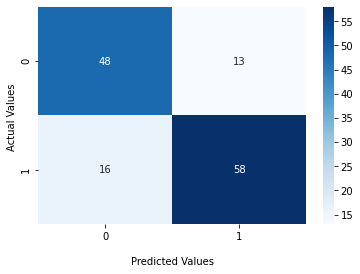

##################### Results Using Random Forest #####################


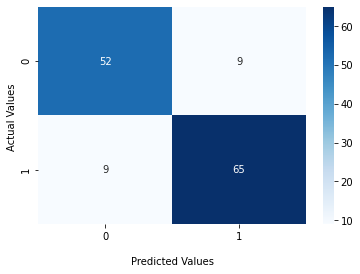

,Model,ROC/AUC,Accuracy,Precision,Recall,F1 Score
6,Random Forest,0.928445,0.866667,0.878378,0.878378,0.878378
3,Gradient Boosting,0.919805,0.844444,0.884058,0.824324,0.853147
4,XGB,0.888569,0.829630,0.892308,0.783784,0.834532
5,Decision Tree,0.849801,0.785185,0.816901,0.783784,0.800000
2,Support Vector Machine,0.763181,0.718519,0.695652,0.864865,0.771084
0,Logistic Regression,0.753434,0.711111,0.701149,0.824324,0.757764
1,Naive Bayes,0.745680,0.718519,0.680000,0.918919,0.781609


In [61]:
# Function to perform training with giniIndex.
def train_using_logregresion(X_train, X_test, y_train):
    # Creating the classifier object
    clf =LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')
    clf.fit(X_train, y_train)
    return clf

def train_using_NB(X_train, X_test, y_train):
    # Creating the classifier object
    clf = GaussianNB()
    # Performing training
    clf.fit(X_train, y_train)
    return clf

def train_using_SVM(X_train, X_test, y_train):
    # Creating the classifier object
    clf = SVC(kernel = 'rbf', random_state = 0, probability=True)
    # Performing training
    clf.fit(X_train, y_train)
    return clf

def train_using_GBM(X_train, X_test, y_train):
    # Creating the classifier object
    clf = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 250, max_depth=4, 
                                     min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
    # Performing training
    clf.fit(X_train, y_train)
    return clf

def train_using_XGB(X_train, X_test, y_train):
    # Creating the classifier object
    clf = XGBClassifier(gamma = 0.1, max_depth = 15, min_child_weight = 1,
                        eval_metric='mlogloss',use_label_encoder=False)
    # Performing training
    clf.fit(X_train, y_train)
    return clf

def train_using_decisiontree(X_train, X_test, y_train):
    # Creating the classifier object
    clf = DecisionTreeClassifier(criterion= 'gini', max_depth = 10, min_samples_leaf = 5,
                                 random_state = 0)
    # Performing training
    clf.fit(X_train, y_train)
    return clf


def train_using_RF(X_train, X_test, y_train):
    # Creating the classifier object
    clf = RandomForestClassifier(max_depth = 13, min_samples_leaf = 1, n_estimators=45, random_state = 0)
    # Performing training
    clf.fit(X_train, y_train)
    return clf
  
  #Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    
    ROC = roc_auc_score(y_test, clf_object.predict_proba(X_test)[:, 1])
    return y_pred, ROC
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    cf_matrix = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix: ",
    #    confusion_matrix(y_test, y_pred))
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    #ax.set_title('Seaborn Confusion Matrix with labels\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    #ax.xaxis.set_ticklabels(['False','True'])
    #ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred )
    rec = recall_score(y_test, y_pred )
    f1 = f1_score(y_test, y_pred)

    return acc, prec, rec, f1
  

clf_lr = train_using_logregresion(X_train, X_test, y_train)
clf_nb = train_using_NB(X_train, X_test, y_train)
clf_svm = train_using_SVM(X_train, X_test, y_train)
clf_gbm = train_using_GBM(X_train, X_test, y_train)
clf_xgbm = train_using_XGB(X_train, X_test, y_train)
clf_dt = train_using_decisiontree(X_train, X_test, y_train)
clf_rf = train_using_RF(X_train, X_test, y_train)



# Operational Phase
print("##################### Results Using Logistic Regression #####################")
y_pred_lr,ROC = prediction(X_test, clf_lr)
acc, prec, rec, f1 = cal_accuracy(y_test, y_pred_lr)
results = pd.DataFrame([['Logistic Regression', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
      
print("##################### Results Using Naive Bayes #####################")
y_pred_nb,ROC = prediction(X_test, clf_nb)
acc, prec, rec, f1= cal_accuracy(y_test, y_pred_nb)
model_results = pd.DataFrame([['Naive Bayes', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print("##################### Results Using Support Vector Machine #####################")
y_pred_svm,ROC = prediction(X_test, clf_svm)
acc, prec, rec, f1=cal_accuracy(y_test, y_pred_svm)
model_results = pd.DataFrame([['Support Vector Machine', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print("##################### Results Using Gradient Boosting #####################")
y_pred_gbm,ROC = prediction(X_test, clf_gbm)
acc, prec, rec, f1=cal_accuracy(y_test, y_pred_gbm)
model_results = pd.DataFrame([['Gradient Boosting', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print("##################### Results Using XGB #####################")
y_pred_xgb,ROC = prediction(X_test, clf_xgbm)
acc, prec, rec, f1=cal_accuracy(y_test, y_pred_xgb)
model_results = pd.DataFrame([['XGB', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print("##################### Results Using Decision Tree #####################")
y_pred_dt,ROC = prediction(X_test, clf_dt)
acc, prec, rec, f1=cal_accuracy(y_test, y_pred_dt)
model_results = pd.DataFrame([['Decision Tree', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print("##################### Results Using Random Forest #####################")
y_pred_rf,ROC = prediction(X_test, clf_rf)
acc, prec, rec, f1=cal_accuracy(y_test, y_pred_rf)
model_results = pd.DataFrame([['Random Forest', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

results = results.sort_values(["ROC/AUC","Precision"], ascending = False)
results

### Evaluate Random Forest using complete dataset

The past table shows that the Random Forest became the optimal model to make predictions for the given dataset, as it has relatively the highest combination of AUC, accuracy, precision, recall, and F1 scores. Hence, we used this model to evaluate its performance when training in the entire train dataset and testing in the true testing dataset. 

In [62]:
clf = train_using_RF(X_train_holdout, X_test_holdout, y_train_holdout)

In [63]:
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    
    ROC = roc_auc_score(y_test_holdout, clf_object.predict_proba(X_test)[:, 1])
    return y_pred, ROC


In the next table, we convey the model's results in terms of precision, recall, F1 scores, and confusion matrix.

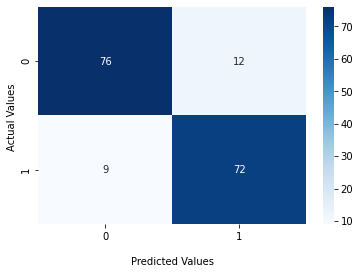

,Model,ROC/AUC,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.920244,0.87574,0.857143,0.888889,0.872727


In [65]:
y_pred, ROC = prediction(X_test_holdout, clf)
acc, prec, rec, f1=cal_accuracy(y_test_holdout, y_pred)
model_results = pd.DataFrame([['Random Forest', ROC, acc, prec, rec, f1]], 
                       columns = ['Model', 'ROC/AUC','Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

# Deployment

This section is in Jupyter 'CRISP-DM Midterm Exam Deployment Phase'.ipynb